<h2 style='color:blue'>Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

**This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices**

https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.15.0'

In [4]:
tf.test.is_built_with_cuda()

True

<h4 style="color:purple">Load the dataset</h4>

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

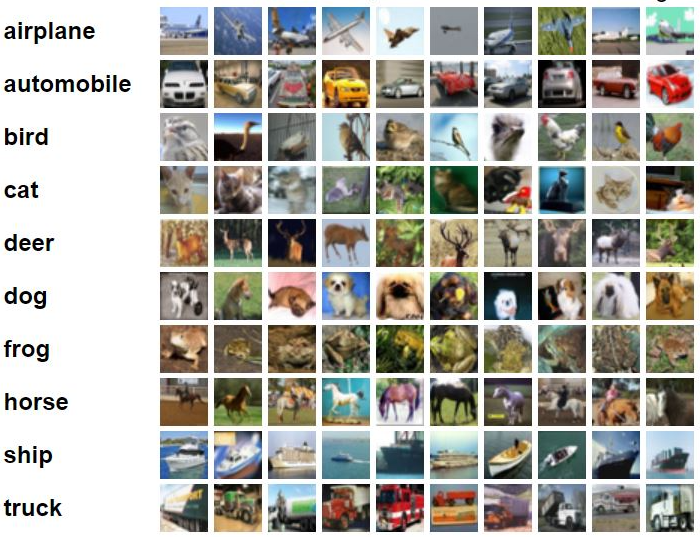

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
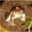

In [11]:
X_train[0]

In [12]:
X_train[0].shape

(32, 32, 3)

In [13]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [16]:
y_train.shape

(50000, 1)

In [18]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

<h4 style="color:purple">Data Visualization</h4>

In [19]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

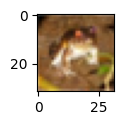

In [20]:
plot_sample(0)

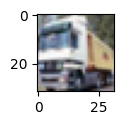

In [21]:
plot_sample(1)

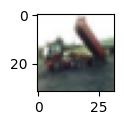

In [22]:
plot_sample(2)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

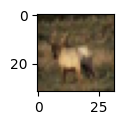

In [24]:
plot_sample(3)

In [29]:
y_train[3]  # This is an array

array([4], dtype=uint8)

In [30]:
y_train[3][0] # This is the element

4

In [25]:
classes[y_train[3][0]]

'deer'

In [26]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [27]:
y_test.shape

(10000, 1)

In [28]:
X_train.shape

(50000, 32, 32, 3)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [33]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [35]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<h4 style="color:purple">Model building and training</h4>

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8110 - accuracy: 0.3547


<h4 style="color:purple">Let's make some predictions</h4>

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 4ms/step


5

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

<h3 style='color:purple'>Measure training time on a CPU<h3>

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 125s 80ms/step - loss: 1.8118 - accuracy: 0.3543
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h3 style='color:purple'>Lets measure training time on a Colab TPU<h3>

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8120 - accuracy: 0.3537
12.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h3 style='color:purple'>Lets run same test for 10 epocs<h3>

In [ ]:
print ("tf.device('/CPU:0'):", tf.device('/CPU:0'))
print ("tf.device('/GPU:0'):", tf.device('/GPU:0'))

tf.device('/CPU:0'): <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a459771d3c0>
tf.device('/GPU:0'): <tensorflow.python.eager.context._EagerDeviceContext object at 0x7a459771f800>


In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.8137 - accuracy: 0.3549
Epoch 2/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6258 - accuracy: 0.4275
Epoch 3/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5442 - accuracy: 0.4571
Epoch 4/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4855 - accuracy: 0.4774
Epoch 5/10
1563/1563 [==============================] - 126s 81ms/step - loss: 1.4358 - accuracy: 0.4941
Epoch 6/10
1563/1563 [==============================] - 124s 80ms/step - loss: 1.3931 - accuracy: 0.5098
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3570 - accuracy: 0.5229
Epoch 8/10
1563/1563 [==============================] - 126s 80ms/step - loss: 1.3209 - accuracy: 0.5357
Epoch 9/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.2865 - accuracy: 0.5495
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8123 - accuracy: 0.3529
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6221 - accuracy: 0.4278
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5413 - accuracy: 0.4586
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4834 - accuracy: 0.4771
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4339 - accuracy: 0.4938
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3909 - accuracy: 0.5106
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3526 - accuracy: 0.5239
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3153 - accuracy: 0.5394
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2850 - accuracy: 0.5485
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.254

- Below table is the performance comparison for 1 epoch and 10 epochs, on RTX Titan

| Epoch | CPU          | RTX Titan GPU  |
|:------|:-------------|:---------------|
| 1     | 43 sec       | 3 sec          |
| 10    | 7 min 26 sec | 30 sec         |

- Below table is the performance comparison for 1 epoch and 10 epochs, on Colab

| Epoch | CPU           | Colab TPU  |
|:------|:--------------|:-----------|
| 1     | 143 sec       | 12.6 sec   |
| 10    | 27 min 23 sec | 79 sec     |

You can see that GPU is almost 11 to 16 times faster. We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning